Ejercicio de las tarjetas de creditos

benchmark de modelos (de clasificación)(knn,decision tree, random forest)
reporte de clasificacion
optimizacion de los modelos
3 o 4 visualizaciones 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
archivo1='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_6/Data/credit_record.csv'
registro=pd.read_csv(archivo1)
archivo2='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_6/Data/application_record.csv'
application=pd.read_csv(archivo2)

In [7]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
registro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [8]:
application['ID'].nunique()

438510

In [10]:
application.drop_duplicates(subset=['ID'],inplace=True)

In [13]:
ocupacion = list(application['OCCUPATION_TYPE'].unique())[1:]
ocupacion

['Security staff',
 'Sales staff',
 'Accountants',
 'Laborers',
 'Managers',
 'Drivers',
 'Core staff',
 'High skill tech staff',
 'Cleaning staff',
 'Private service staff',
 'Cooking staff',
 'Low-skill Laborers',
 'Medicine staff',
 'Secretaries',
 'Waiters/barmen staff',
 'HR staff',
 'Realty agents',
 'IT staff']

Rellenando la data con un choice y lambda

In [14]:
import random
application["OCCUPATION_TYPE"][application["OCCUPATION_TYPE"].isnull()]=application["OCCUPATION_TYPE"][application["OCCUPATION_TYPE"].isnull()].apply(lambda x:  random.choice(ocupacion) )

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_1320/356646798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application["OCCUPATION_TYPE"][application["OCCUPATION_TYPE"].isnull()]=application["OCCUPATION_TYPE"][application["OCCUPATION_TYPE"].isnull()].apply(lambda x:  random.choice(ocupacion) )


In [15]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [16]:
application.duplicated().sum()

0

In [17]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Waiters/barmen staff,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Security staff,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,Managers,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,Low-skill Laborers,2.0


In [19]:
len(application['OCCUPATION_TYPE'].unique())

18

In [21]:
from sklearn.preprocessing import LabelEncoder
etiq = LabelEncoder()
Label = etiq.fit_transform(application["CODE_GENDER"])
label_embarked = {index: label for index, label in 
                  enumerate(etiq.classes_)}
label_embarked
application["CODE_GENDER"]=Label

In [63]:
from sklearn.preprocessing import LabelEncoder
etiq = LabelEncoder()
Label = etiq.fit_transform(application["FLAG_OWN_CAR"])
label_embarked = {index: label for index, label in 
                  enumerate(etiq.classes_)}
label_embarked
application["FLAG_OWN_CAR"]=Label

In [64]:
from sklearn.preprocessing import LabelEncoder
etiq = LabelEncoder()
Label = etiq.fit_transform(application["FLAG_OWN_REALTY"])
label_embarked = {index: label for index, label in 
                  enumerate(etiq.classes_)}
label_embarked
application["FLAG_OWN_REALTY"]=Label

In [67]:
etiq = LabelEncoder()
Label = etiq.fit_transform(application["NAME_EDUCATION_TYPE"])
label_embarked = {index: label for index, label in 
                  enumerate(etiq.classes_)}
label_embarked
application["NAME_EDUCATION_TYPE"]=Label

In [68]:
etiq = LabelEncoder()
Label = etiq.fit_transform(application["NAME_INCOME_TYPE"])
label_embarked = {index: label for index, label in 
                  enumerate(etiq.classes_)}
label_embarked
application["NAME_INCOME_TYPE"]=Label

In [69]:
etiq = LabelEncoder()
Label = etiq.fit_transform(application["NAME_HOUSING_TYPE"])
label_embarked = {index: label for index, label in 
                  enumerate(etiq.classes_)}
label_embarked
application["NAME_HOUSING_TYPE"]=Label

In [70]:
etiq = LabelEncoder()
Label = etiq.fit_transform(application["OCCUPATION_TYPE"])
label_embarked = {index: label for index, label in 
                  enumerate(etiq.classes_)}
label_embarked
application["OCCUPATION_TYPE"]=Label

In [72]:
etiq = LabelEncoder()
Label = etiq.fit_transform(application["NAME_FAMILY_STATUS"])
label_embarked = {index: label for index, label in 
                  enumerate(etiq.classes_)}
label_embarked
application["NAME_FAMILY_STATUS"]=Label

In [73]:
tiposdatos2=pd.DataFrame(application.dtypes) #Codigo mostrado en clases por un compañero
tiposdatos2.reset_index(inplace=True)
tiposdatos2

,index,0
0,ID,int64
1,CODE_GENDER,int64
2,FLAG_OWN_CAR,int64
3,FLAG_OWN_REALTY,int64
4,CNT_CHILDREN,int64
5,AMT_INCOME_TOTAL,float64
6,NAME_INCOME_TYPE,int64
7,NAME_EDUCATION_TYPE,int64
8,NAME_FAMILY_STATUS,int64
9,NAME_HOUSING_TYPE,int64


In [ ]:
for i in range(len(application.columns)):
        if application.dtypes[i] == 'object':
                etiq = LabelEncoder()
                Label = etiq.fit_transform(application[application.columns[i]])
                label_embarked = {index: label for index, label in 
                                enumerate(etiq.classes_)}
                label_embarked
                application["FLAG_OWN_REALTY"]=Label

In [22]:
registro

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [23]:
diccionario_categorias = {'X' : '0', 'C' : '1', '0' : '2', '1' : '3', '2' : '4', '3' : '5', '4' : '6', '5' : '7'}
registro.replace({'STATUS' : diccionario_categorias}, inplace=True)

In [24]:
registro

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,2
2,5001711,-2,2
3,5001711,-3,2
4,5001712,0,1
...,...,...,...
1048570,5150487,-25,1
1048571,5150487,-26,1
1048572,5150487,-27,1
1048573,5150487,-28,1


In [26]:
registro['STATUS']=pd.to_numeric(registro['STATUS'])

In [27]:
registro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


In [55]:
registros_agrupados=registro.groupby(['ID'])[['STATUS']].mean().reset_index()

In [56]:
registros_agrupados

,ID,STATUS
0,5001711,1.500000
1,5001712,1.526316
2,5001713,0.000000
3,5001714,0.000000
4,5001715,0.000000
...,...,...
45980,5150482,1.666667
45981,5150483,0.000000
45982,5150484,1.923077
45983,5150485,2.000000


In [57]:
registros_agrupados['STATUS'].nunique()

2033

<AxesSubplot:>

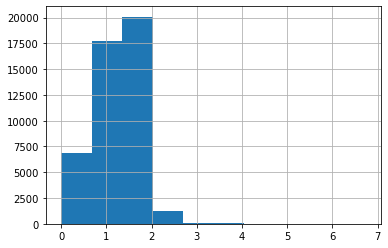

In [58]:
registros_agrupados['STATUS'].hist()

In [59]:
credito_aprobado=[]
for i in registros_agrupados['STATUS']:
    if i <1.5:
        credito_aprobado.append(0)
    else:
        credito_aprobado.append(1)
registros_agrupados['Aprobado']=credito_aprobado

In [60]:
registros_agrupados

,ID,STATUS,Aprobado
0,5001711,1.500000,1
1,5001712,1.526316,0
2,5001713,0.000000,1
3,5001714,0.000000,1
4,5001715,0.000000,1
...,...,...,...
45980,5150482,1.666667,0
45981,5150483,0.000000,1
45982,5150484,1.923077,0
45983,5150485,2.000000,0


In [61]:
registros_agrupados['Aprobado'].value_counts()

1    29145
0    16840
Name: Aprobado, dtype: int64

In [74]:
data_completo=pd.merge(registros_agrupados,application,how='inner',on=['ID'])
data_completo

,ID,STATUS,Aprobado,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1.125000,1,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,17,2.0
1,5008805,1.133333,1,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,16,2.0
2,5008806,0.700000,1,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,16,2.0
3,5008808,0.800000,1,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
4,5008809,0.000000,1,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5150482,1.666667,0,0,1,1,1,157500.0,4,4,1,1,-10808,-1739,1,0,0,0,3,3.0
36453,5150483,0.000000,1,0,1,1,1,157500.0,4,4,1,1,-10808,-1739,1,0,0,0,3,3.0
36454,5150484,1.923077,0,0,1,1,1,157500.0,4,4,1,1,-10808,-1739,1,0,0,0,3,3.0
36455,5150485,2.000000,0,0,1,1,1,157500.0,4,4,1,1,-10808,-1739,1,0,0,0,3,3.0


Creando los modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [75]:
X = data_completo.drop(columns=["ID",'STATUS','Aprobado'])
y = data_completo["Aprobado"]

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5,stratify=y_val)

Decision tree